**Project: Workflow Linear_Regression**

**_By : Esperance D. ASNGAR_**
 

**_Contexte du projet_**

**Etape 1 : Choisir un secteur qui vous interesse**

**Etape 2 : Trouver une problematique - identifier une target**

**Etape 3 : Sélectionner une ou des bases de données (SQL, CSV, API, scraping, etc...)**

**Etape 4 : Réaliser l’analyse de donnée**

**Etape 5 : Réaliser un model de machine de learning (regression lineaire)**

_Rendu : Présentation Oral d’un Notebook propre, légé et bien structuré (legend et titre sur les graphiques, abscisse et ordonnée. Faire des parties dans le notebook.)

## **SECTEUR: SANTE**

- Prediction de la detection des pathologies : detection 
- Prediction des risques ...
- Prediction des frais de prise en charge ...


## **PROBLEMATIQUE**
- Dans quelle mesure le cout de l'assurance maladie est t'il influencé par le contexte social? 
  
     _target_: cout assurance maladie (Charge en $)



## **BASE DES DONNEES .CSV**

**Preparation de l'environnement de travail**
- Import de tous les packages necessaire (snippets)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,RobustScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn import set_config
set_config(display="diagram")
import pickle
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

- _Source des données :_https://www.kaggle.com/datasets/mirichoi0218/insurance_

In [2]:
#Récuperation de l'ensemble des données
data = pd.read_csv("insurance.csv")

## **TRAITEMENT DES DONNEES**

 **Aperçu des données :**


In [3]:
# 5 premières ligne de notre table de données 
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


- age = age du bénéficiaire
- sex = sexe de l'assureur, féminin, masculin
- bmi = Indice de masse corporelle, fournissant une compréhension du corps, des poids relativement élevés ou faibles par rapport à la taille,
indice objectif du poids corporel (kg / m ^ 2) utilisant le rapport taille / poids, idéalement 18,5 à 24,9.
- children: Nombre d'enfants couverts par l'assurance maladie
- smoker : fumeur 
- region : la zone résidentielle du bénéficiaire aux États-Unis, nord-est, sud-est, sud-ouest, nord-ouest
- charges : Frais médicaux individuels facturés par l'assurance maladie

 **Analyse des données :**

 Question_ 1: Quelle est la composition de cette table ? 

In [4]:
#general informations about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking missing values by percent
data.isna().sum()*100 /len(data) ;

     Reponse:
 
      - Composition: 1338 lignes & 7 colonnes 
      - Trois types de données : Int64(2), Float(2) & Categorielles (3)
      - Valeurs manquantes = 0 %


Question_ 2: Quelle est la repartition de ces variables ? 

In [6]:
#Comptage par colonne:
data.nunique();

In [7]:
#cheking duplicate data:
data.duplicated().sum()*100 /len(data);

In [8]:
#statistiques 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


    Reponse:
    - 47       : ages diffrents 
    - 2 genres : homme ou femme 
    - 548      : valeurs differentes de bmi 
    - 6        : valeurs differentes pour le nombre d'enfants à charge 
    - 2        : fumeur ou non fumeur 
    - 4        : regions des USA 
    - Valeurs doubles = 1 <==> 0,074% des valeurs donc aucun action de menée.

Question_ 3: Quelle est la relation entre les differentes variables ? 

In [9]:
#trannsformation des colonnes pour observer la correlation
df = data.copy()

#remplacer female(1), male(0), smoker_yes(0), smoker_no(1)
df["sex"].replace(["male","female"], [0,1], inplace=True)
df["smoker"].replace(["yes","no"], [0,1], inplace=True)

In [10]:
df.head(3);

_Reponse chiffrée_

In [11]:
# Variance des features (valeurs numeriques uniquement)
df1= df.drop(["region"],axis=1)

#Correlation between columns:
df1.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.787251
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,1.000000


 _Reponse imagée_

In [12]:
#montrer la correlation entre les features
#plt.figure(figsize=(7,7))
#sns.heatmap(df1.corr(), annot=True,linewidth=.5);

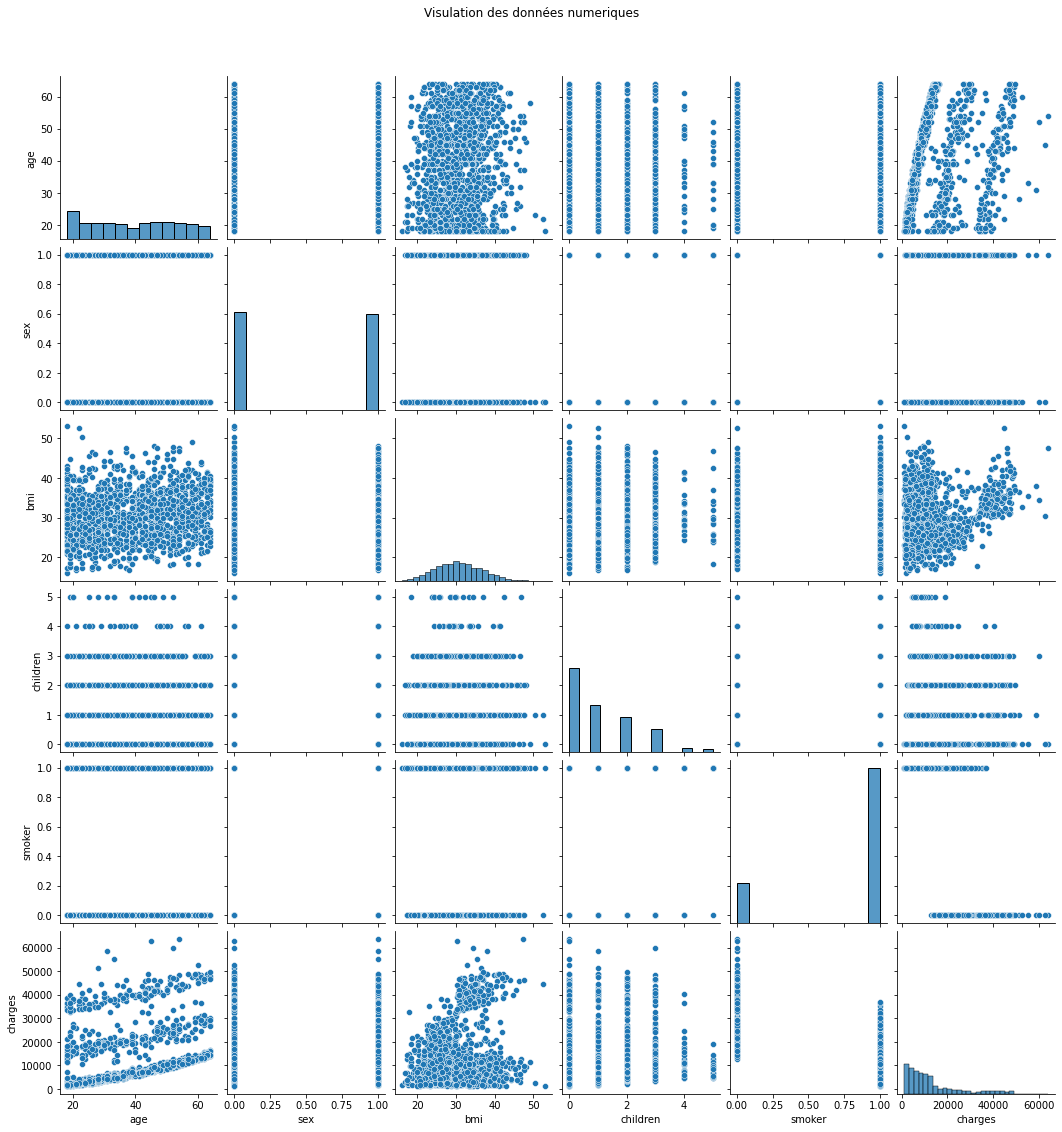

In [13]:
#visualisation des données :
viz_num = sns.pairplot(df1);
viz_num.fig.suptitle("Visulation des données numeriques", y=1.05); # y= some height>1

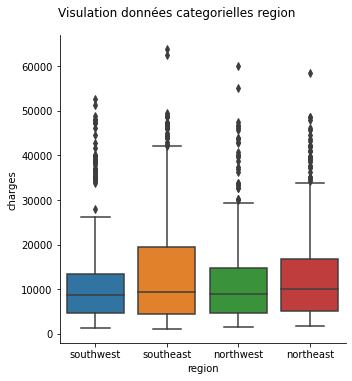

In [14]:
#Visualisation des données 
viz_cat_1 = sns.catplot(data=data, x="region", y="charges",kind="box")
viz_cat_1.fig.suptitle("Visulation données categorielles region", y=1.05);

## **Réaliser un model de machine de learning (regression lineaire)**

**Preparing our Dataset**

In [15]:
#target y = charges
y = df["charges"]

#features = X:
X = df.drop(["charges","region"],axis=1)

#spliting 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 50)

**Preprocessing our features**

- instantiation de la classe de preprocessing pour lancer la démarche de fitting et scaling du model.
- entraînement du model sur les features d’entraînement (toujours)
- mise à l'échelle des features (données présentes en X dans le dataset d'étude)


In [16]:
#numerics_pipeline: enlever les valeurs manquantes avec SimpleImputer(), standardize avec Minmaxscaler
num_pipeline = Pipeline([('imputer', SimpleImputer()),('minmax_scaler', MinMaxScaler())])

#numerics_pipeline: enlever les valeurs manquantes avec SimpleImputer(), standardize avec Minmaxscaler
num_pipeline_stsc = Pipeline([('imputer', SimpleImputer()),('Robustscler', RobustScaler())])

#categorical_pipeline: enlever les valeurs manquantes avec :
#OneHotEncoder(dont la strategie est d'ignorer ces valeurs)
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore', drop='first'))

#prepocessor est un transfromer dans qui execute les series de transformations sur les colones 
preprocessor = ColumnTransformer([('num_transformer', num_pipeline, ["age","bmi"]),
                                     ('cat_transformer', categorical_pipeline, 
                                      ["sex","smoker","children"])])


**Chosing Linear Regression as our machine learning model**

In [17]:
#creation du model :
linear_model = make_pipeline(preprocessor,LinearRegression())

#Entrainement du model 
linear_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

In [18]:
#Model evaluation: .score(X_test, y_test)
model_score = linear_model.score(X_test, y_test)
# On récupère le R^2 de notre modèle en le testant avec y_test en fonction de X_test_mms
print(f'Coefficient of determination : R2 = {model_score}') 

Coefficient of determination : R2 = 0.784284645070739


**Cheking homocedasticity & normal distribution of errors condition**

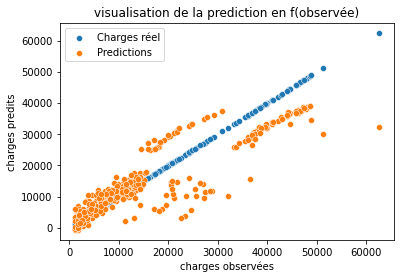

In [19]:
# On calcule y_pred en appliquant la méthode 'predict()' sur notre modèle
y_pred = linear_model.predict(X_test)  

#Data pour voir la prediciton 
data_charges =y_test.copy()
data_charges = data_charges.reset_index()
data_charges["predict"] = y_pred 

data_charges = data_charges.drop(["index"], axis=1)

# Visualiser la prediction par rapport aux valeurs obeservées
ax = sns.scatterplot(data = data_charges, x = "charges", y ="charges", label = "Charges réel")
ax2  = sns.scatterplot(data = data_charges , x = "charges", y ="predict", label = "Predictions")
ax.set(xlabel="charges observées", ylabel="charges predits", title ="visualisation de la prediction en f(observée)")
plt.legend()
plt.show();

In [20]:
data_charges.head()

,charges,predict
0,5976.8311,8057.898423
1,5846.9176,12207.840016
2,13831.1152,16897.068402
3,9625.9200,11429.389465
4,2680.9493,549.836529


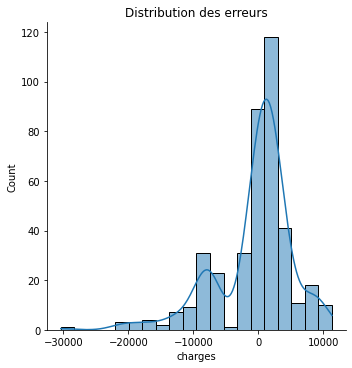

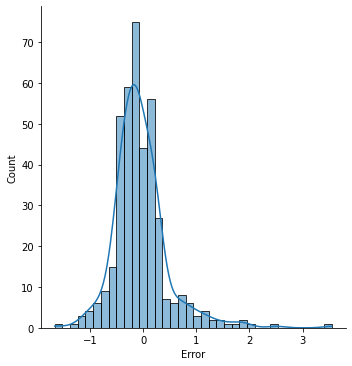

In [21]:
#Traitement des residus: erreur entre l'observée & la predicte
residus = y_pred - y_test
viz_norm = sns.displot(residus, bins=20, kde=True)
viz_norm.set(title= "Distribution des erreurs");
sns.displot(np.log(data_charges["charges"]) - np.log(data_charges["predict"]), kde = True)
plt.xlabel('Error')
plt.show();

In [22]:
#metric de vreficiation du score de mon model 
# The mean squared error :
print(f"Mean squared error : MSE = {mean_squared_error(y_test,y_pred,squared=False)}")

Mean squared error : MSE = 5948.3775303706925


**CROSS VALIDATION**

In [23]:
# Cross-validate Pipeline
# On récupère le R^2 de notre modèle en le testant avec y_test en fonction de X_test_mms
print(f"tableaux des coefficient de determination:  \n R2_scores = {cross_val_score(linear_model, X_train, y_train, cv=10, scoring='r2')}") 
print(f"Avec une moyenne de coef determination : R2_sc_mean = {cross_val_score(linear_model, X_train, y_train, cv=10, scoring='r2').mean()}") 

tableaux des coefficient of determination:  
 R2_scores = [0.78001376 0.63087121 0.78917343 0.78943112 0.68639668 0.52442602
 0.77129242 0.64643965 0.76196398 0.69451669]
Avec une moyenne de coef determination : R2_sc_mean = 0.7074524957468655


**Conclusion**
  J'en conclus... 

## **Amelioration du model de machine de learning (regression lineaire)**

In [24]:
#Nouveau ensemble de données:
data_new = data.copy()
#Transformer la colone bmi : obèse (1) ou pas obèse(0)
data_new["obese"] = data_new["bmi"]>30

#target y = charges
y_1= data_new["charges"]

#features = X (age,sex,obese,smoker)
X_1 = data_new.drop(["charges","region"],axis=1)

#Partage des données 70/30
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.3, random_state= 50)


**Au niveau des features**

In [25]:
# Nouveau prepocesseur avec les nouveaux features 
pipeline_processor = ColumnTransformer([
    ('num_transformer', num_pipeline, ["age"]),
    ('cat_transformer', categorical_pipeline, ["smoker","bmi","sex","children"])
])

#choix du model de regression linéaire 
pipeline_workflow = make_pipeline(pipeline_processor, LinearRegression())

#Entrainement du model 
pipeline_workflow.fit(X_train_1,y_train_1)

#Evaluation du nouveau model 
model_score_2 = pipeline_workflow.score(X_test_1, y_test_1)
print(f'Coefficient of determination : R2_ameliorer = {model_score_2}')

Coefficient of determination : R2_ameliorer = 0.6812607321784878


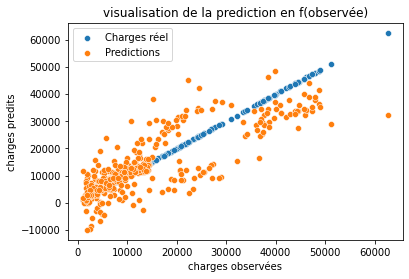

In [26]:
# On calcule y_pred en appliquant la méthode 'predict()' sur notre modèle
y_pred_1 = pipeline_workflow.predict(X_test_1)

data_charges["predict_new"] = y_pred_1

# Visualiser la prediction par rapport aux valeurs obeservées
ax = sns.scatterplot(data = data_charges, x = "charges", y ="charges", label = "Charges réel")
ax3 = sns.scatterplot(data = data_charges , x = "charges", y ="predict_new", label = "Predictions")
ax.set(xlabel="charges observées", ylabel="charges predits", title ="visualisation de la prediction en f(observée)")
plt.legend()
plt.show();


In [27]:
#metric de vreficiation du score de mon model 
# The mean squared error :
print(f"Mean squared error : MSE = {mean_squared_error(y_test_1,y_pred_1,squared=False)}")

Mean squared error : MSE = 7230.62402444233


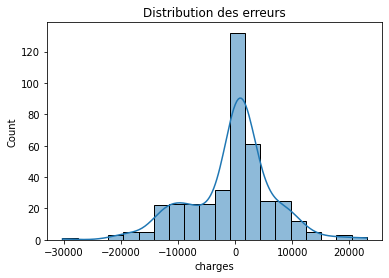

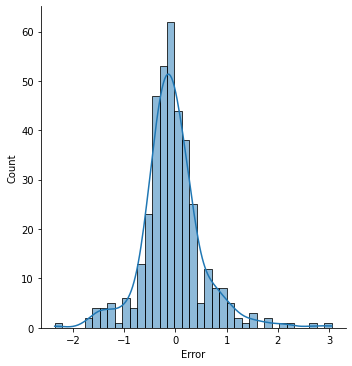

In [28]:
#Traitement des residus: erreur entre l'observée & la predicte
residus_1 = y_pred_1 - y_test_1
viz_norm_1 = sns.histplot(residus_1, bins=20, kde=True)
viz_norm_1.set(title= "Distribution des erreurs");
sns.displot(np.log(data_charges["charges"]) - np.log(data_charges["predict_new"]), kde = True)
plt.xlabel('Error')
plt.show();

In [29]:
# Cross-validate Pipeline
# On récupère la moyenne de R2_crosV:
print(f"Coefficient of determination : R2_crosV = {cross_val_score(pipeline_workflow, X_train_1, y_train_1, cv=10, scoring='r2').mean()}")

Coefficient of determination : R2_crosV = 0.5846532088649069


## **ENREGISTRMENT DU MODEL**

In [30]:
# Création d'un fichier .pkl qui représente notre pipeline avec ses paramètres (model preprocessing + model) :
pickle.dump(linear_model, open('pipeline_reglinear.pkl', 'wb'))
pickle.dump(pipeline_workflow, open('pipeline_workflow.pkl', 'wb'))

#### GESTION DES PARAMETRES DE L'AMELIORATION

In [31]:
X_df = df.drop(["charges","region"],axis=1)
ydf = df["charges"] 
X_df.head(5)

,age,sex,bmi,children,smoker
0,19,1,27.900,0,0
1,18,0,33.770,1,1
2,28,0,33.000,3,1
3,33,0,22.705,0,1
4,32,0,28.880,0,1


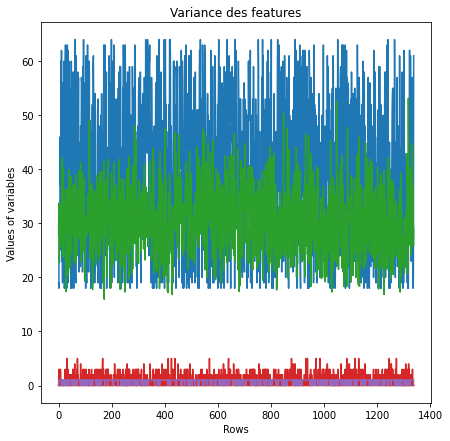

In [32]:
plt.figure(figsize=(7,7));
plt.plot(X_df);
plt.xlabel("Rows")
plt.ylabel("Values of variables")
plt.title("Variance des features");
#plt.legend();